In [81]:
#import necessary libraries
import seaborn as sns
import pandas as pd #for python data analysis
import matplotlib.pyplot as plt#for visualization
from sklearn.model_selection import train_test_split #for dividing test data and train data
from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.preprocessing import LabelEncoder #for label encoding
from sklearn.datasets import load_breast_cancer
#IMPORTING DIFFERENT ML ALGORITHMS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [82]:
#Loading dataset
BC_data = load_breast_cancer()
#returns a Bunch object, which is similar to a dictionary,
#values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.

In [83]:
print("Keys of the dataset:", BC_data .keys())

Keys of the dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [84]:
print("\nFeature Names:", BC_data .feature_names)# Display the feature names


Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [85]:
print("\nTarget Names:", BC_data.target_names)# Display the target names (classes)


Target Names: ['malignant' 'benign']


In [86]:
print("\nShape of data (features):", BC_data.data.shape)


Shape of data (features): (569, 30)


In [87]:
print("\nShape of target (labels):",BC_data.target.shape)


Shape of target (labels): (569,)


In [88]:
data_df = pd.DataFrame(data = BC_data.data,columns = BC_data.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [89]:
#PREPROCESSING STEPS

"""Handling missing values: Missing values can affect the accuracy of machine learning models.
Handling missing values helps to ensure that the models are trained on complete data 
can be handled using folllwing methods isnull(),dropna(inplace=True),fillna()"""
# Check for missing values
#print(data_df.isnull().sum())  # Sum of missing values per column
if data_df.isnull().sum().sum() == 0:     #total sum of missing values
    print("No missing values detected.")

[ ]


No missing values detected.


[]

In [90]:
# Display basic statistics to understand feature distribution
print(data_df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [91]:
data_df = pd.DataFrame(BC_data.data, columns=BC_data.feature_names)  #Converts the BC_data.data array into a Pandas DataFrame for easier manipulation.
data_df['target'] = BC_data.target                                   #Adds the target column (data.target) to the DataFrame as a new column called 'target'
x=data_df.drop('target', axis=1)                                     # x->features
y=data_df['target']                                                  #y = pd.Series(data.target)   y->target                                   # x->features

In [92]:
#3.Data split:

""""Splitting the dataset into training and testing sets helps to evaluate the performance of the machine learning models. This ensures that the models are generalizing well to unseen data.

 X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)"""

'"Splitting the dataset into training and testing sets helps to evaluate the performance of the machine learning models. This ensures that the models are generalizing well to unseen data.\n\n X_train, X_test, y_train, y_test = train_test_split(df.drop(\'target\', axis=1), df[\'target\'], test_size=0.2, random_state=42)'

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) #splitting data for training and testing
# Print the shapes of the resulting datasets
print("Training Features Shape:", x_train.shape)
print("Testing Features Shape:", x_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (455, 30)
Testing Features Shape: (114, 30)
Training Target Shape: (455,)
Testing Target Shape: (114,)


In [94]:
#2.Data scaling: 

"""Scaling the features helps to prevent features with large ranges from dominating the model.
This ensures that all features are treated equally by the model.
sc = StandardScaler()
df[['column_name']] = sc.fit_transform(df[['column_name']])"""


"Scaling the features helps to prevent features with large ranges from dominating the model.\nThis ensures that all features are treated equally by the model.\nsc = StandardScaler()\ndf[['column_name']] = sc.fit_transform(df[['column_name']])"

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)  # Fit and transform on training set
X_test_scaled = scaler.transform(x_test)       # Transform only on test set (using training scaler)

# Output shapes for verification
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (455, 30)
Testing set shape: (114, 30)


In [96]:
#4Data transformation:

"""Transforming categorical variables into numerical variables helps to ensure that the machine learning models can handle them correctly. One-hot encoding:

Use the get_dummies function
 or
Label encoding: Use the LabelEncoder from scikit-learn"""

'Transforming categorical variables into numerical variables helps to ensure that the machine learning models can handle them correctly. One-hot encoding:\n\nUse the get_dummies function\n or\nLabel encoding: Use the LabelEncoder from scikit-learn'

In [97]:
y
# Target Variable: No processing is required as it is already in numeric binary form (0 and 1). no categorical value
#le = LabelEncoder()
#data_df['target'] = le.fit_transform(data_df['target'])
#data_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [98]:
""" ** Machine Learning Algorithms to Implement**:

1.Logistic Regression

Logistic Regression is a suitable algorithm for this dataset because it's a binary classification problem,
and Logistic Regression is a popular choice for binary classification tasks.
"""

" ** Machine Learning Algorithms to Implement**:\n\n1.Logistic Regression\n\nLogistic Regression is a suitable algorithm for this dataset because it's a binary classification problem,\nand Logistic Regression is a popular choice for binary classification tasks.\n"

In [99]:
# Implement Logistic Regression
lr = LogisticRegression()# Initialization
lr.fit(X_train_scaled, y_train)
y_pred_LR = lr.predict(X_test_scaled)
y_pred_LR

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [100]:
#2.Decision Tree Classifier

"""Captures non-linear relationships, interpretable via tree visualization.
Decision Tree Classifier is a suitable algorithm for this dataset because it can handle high-dimensional data and is robust to outliers."""

'Captures non-linear relationships, interpretable via tree visualization.\nDecision Tree Classifier is a suitable algorithm for this dataset because it can handle high-dimensional data and is robust to outliers.'

In [101]:
# Implement Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_DT = dt.predict(X_test_scaled)
y_pred_DT

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [102]:
#3.Random Forest Classifier

"""An ensemble of decision trees, handles overfitting better than single trees. 
Random Forest Classifier is a suitable algorithm for this dataset because it can handle high-dimensional data, is robust to outliers, and can reduce overfitting.

"""


'An ensemble of decision trees, handles overfitting better than single trees. \nRandom Forest Classifier is a suitable algorithm for this dataset because it can handle high-dimensional data, is robust to outliers, and can reduce overfitting.\n\n'

In [103]:
# Implement Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_RF = rf.predict(X_test_scaled)
y_pred_RF

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [104]:
#4.Support Vector Machine (SVM)

"""Effective for high-dimensional spaces, works well with clear margins of separation.
SVM is a suitable algorithm for this dataset because it can handle high-dimensional data and is robust to outliers."""

'Effective for high-dimensional spaces, works well with clear margins of separation.\nSVM is a suitable algorithm for this dataset because it can handle high-dimensional data and is robust to outliers.'

In [105]:
# Implement Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_SVM = svm.predict(X_test_scaled)
y_pred_SVM

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [106]:
"""** 5.k-Nearest Neighbors (k-NN)**

A non-parametric approach, works well when the decision boundary is irregular k-NN is a suitable algorithm for this dataset because it's a simple and intuitive algorithm that can handle high-dimensional data."""

"** 5.k-Nearest Neighbors (k-NN)**\n\nA non-parametric approach, works well when the decision boundary is irregular k-NN is a suitable algorithm for this dataset because it's a simple and intuitive algorithm that can handle high-dimensional data."

In [107]:
# Implement k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_KNN = knn.predict(X_test_scaled)
y_pred_KNN

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [108]:
#Model Comparison

In [109]:
# Compare the performance of the five classification algorithms
print("\n\n************************************************************************\n")
print("\tLogistic Regression:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))
print("\n************************************************************************\n")
print("\tDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Classification Report:")
print(classification_report(y_test, y_pred_DT))
print("\n************************************************************************\n")
print("\tRandom Forest Classifier:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print("Classification Report:")
print(classification_report(y_test, y_pred_RF))
print("\n************************************************************************\n")
print("\tSupport Vector Machine (SVM):\n")
print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("Classification Report:")
print(classification_report(y_test, y_pred_SVM))
print("\n************************************************************************\n")
print("\tnk-Nearest Neighbors (k-NN):\n")
print("Accuracy:", accuracy_score(y_test, y_pred_KNN))
print("Classification Report:")
print(classification_report(y_test, y_pred_KNN))



************************************************************************

	Logistic Regression:

Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


************************************************************************

	Decision Tree Classifier:
Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


****************************************

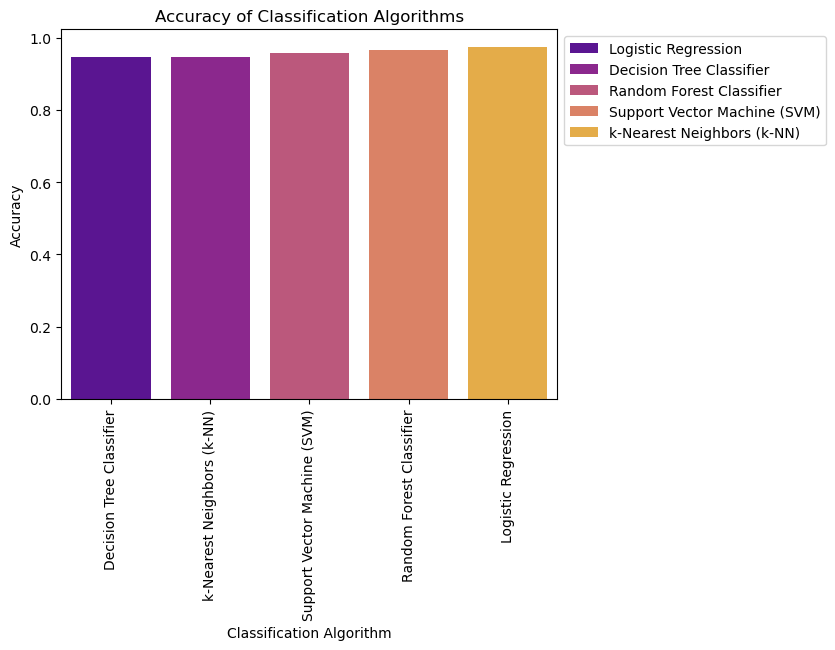

In [110]:
# Define the accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_LR),
    'Decision Tree Classifier': accuracy_score(y_test, y_pred_DT),
    'Random Forest Classifier': accuracy_score(y_test, y_pred_RF),
    'Support Vector Machine (SVM)': accuracy_score(y_test, y_pred_SVM),
    'k-Nearest Neighbors (k-NN)': accuracy_score(y_test, y_pred_KNN)
}
sorted_accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda item: item[1]) )# key=lambda item: item[1] sorting is based on the values rather than the keys
# Create a bar chart
sns.barplot(x=sorted_accuracy_scores.keys(),y=sorted_accuracy_scores.values(),data=sorted_accuracy_scores,hue=accuracy_scores.keys(),palette="plasma")
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Algorithms')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #legend loc outside top right corner

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

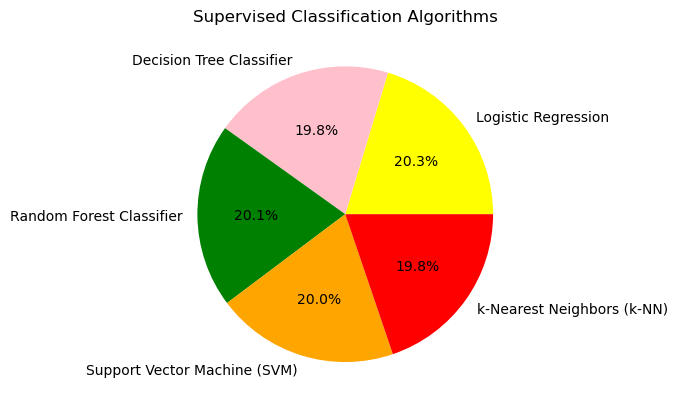

In [111]:
plt.pie(x=accuracy_scores.values(),labels=accuracy_scores.keys(),colors=["yellow", "pink", "green", "orange","red"], autopct="%1.1f%%")
plt.title("Supervised Classification Algorithms")
plt.show()


In [112]:
"""Summary of Model Performance

Ranking by Accuracy:

1.Logistic Regression: 97.37% (Best)

2.Random Forest Classifier: 96.49%

3.Support Vector Machine (SVM): 95.61%

4.Decision Tree Classifier: 94.74%

5.k-Nearest Neighbors (k-NN): 94.74% (Worst)

Best Model:

Logistic Regression achieved the highest accuracy (97.37%) with well-balanced precision, recall, and F1-score.

Worst Models:

Decision Tree Classifier and k-NN had the lowest accuracy (94.74%), possibly due to overfitting (Decision Tree) and sensitivity to scaling and parameter selection (k-NN).

Comparison of Performance Metrics

Algorithm	Accuracy	Precision	Recall	F1-score
Logistic Regression	0.9737	0.98	0.95	0.97
Random Forest Classifier	0.9649	0.98	0.93	0.96
Support Vector Machine (SVM)	0.9561	0.97	0.96	0.96
Decision Tree Classifier	0.9474	0.96	0.93	0.94
k-Nearest Neighbors (k-NN)	0.9474	0.96	0.93	0.94
Conclusion

Logistic Regression performed the best among the five algorithms, with an accuracy score of 0.9737. k-Nearest Neighbors (k-NN) and Decision Tree Classifier performed the worst, with accuracy scores of 0.9474. 
Random Forest Classifier and Support Vector Machine (SVM) had accuracy scores in between."""

'Summary of Model Performance\n\nRanking by Accuracy:\n\n1.Logistic Regression: 97.37% (Best)\n\n2.Random Forest Classifier: 96.49%\n\n3.Support Vector Machine (SVM): 95.61%\n\n4.Decision Tree Classifier: 94.74%\n\n5.k-Nearest Neighbors (k-NN): 94.74% (Worst)\n\nBest Model:\n\nLogistic Regression achieved the highest accuracy (97.37%) with well-balanced precision, recall, and F1-score.\n\nWorst Models:\n\nDecision Tree Classifier and k-NN had the lowest accuracy (94.74%), possibly due to overfitting (Decision Tree) and sensitivity to scaling and parameter selection (k-NN).\n\nComparison of Performance Metrics\n\nAlgorithm\tAccuracy\tPrecision\tRecall\tF1-score\nLogistic Regression\t0.9737\t0.98\t0.95\t0.97\nRandom Forest Classifier\t0.9649\t0.98\t0.93\t0.96\nSupport Vector Machine (SVM)\t0.9561\t0.97\t0.96\t0.96\nDecision Tree Classifier\t0.9474\t0.96\t0.93\t0.94\nk-Nearest Neighbors (k-NN)\t0.9474\t0.96\t0.93\t0.94\nConclusion\n\nLogistic Regression performed the best among the five a